**Aluno**: Artur Chiaperini Grover.



# Trabalho 6 - Transformada de Fourier e realce no domínio da frequência

Faça as seguintes simulações no jupyther notebook e aproveite os recursos disponíveis para explicar os fundamentos e resultados obtidos

### (1) Série de Fourier de função unidimensional

A função triangular, representada pelo gráfico a seguir, é uma função periódica. Esta classe de funções pode ser representa através de uma série de Fourier.

![](../images/GraficoFuncaoTriangular.png)

A série de Fourier que representa esta função é dada pela seguinte equação:

![](../images/triangularFuncao.png)

Varie o número de senóides para apresentar graficamente diferentes aproximações da função triangular.

[Referência](http://www.matematica.pucminas.br/profs/web_fabiano/calculo4/sf.pdf)

### (2) Prova empírica da propriedade translação e mudança de fase

* (2.1) - Crie duas imagens binárias contendo um mesmo objeto geométrico. A diferença entre as imagens é a translação em que o objeto aparece.
* (2.2) - Calcule o módulo da transformada de Fourier de cada uma das imagens
* (2.3) - Faça a subtração entre estas imagens e a utilize para demostrar a propriedade  
    
    Referência: Gonzalez e Woods Processamento digital de Imagens

### (3) Filtragem de Fourier pegue uma fotografia de sua autoria.

Execute a filtragem passa-baixa de Fourier desta imagem usando os filtros Butterworth e Ideal.

Compare os resultados obtidos em termos dos fundamentos teóricos correspondentes. 

Referência: Gonzalez e Woods Processamento digital de Imagens

### (4) Filtros espaciais aproximados

Utilizando a imagem e o filtro de Butterworth empregados no exercício anterior, obtenha filtros aproximados no domínio espacial de dimensões nxn . Para este valor de n calcule o somatório do erro quadrático da diferença entre os resultados obtidos pelo filtro exato e o aproximado. Repita este procedimento para diferentes valores de n e trace o gráfico n x SSE. Analise e explique os resultados obtidos. 

-------

### Bibliotecas

In [1]:
import numpy as np
import cv2 as cv

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

-------

## (1) Série de Fourier

Uma função periódica pode ser escrita por uma série de Fourier. A seguir mostraremos o resultado de uma série de Fourier, ao variar o número de senóides de sua expansão.

Partiremos da seguinte equação:

$$
\begin{equation}
    f(x) \sim \frac{1}{2} - \frac{4}{\pi^{2}}\sum^{\infty}_{k = 0}\frac{1}{(2k - 1)^{2}}\sin[(2k - 1)\pi x],
\end{equation}
$$

em que variar o número de senóides significa aumentar os termos do somatório.



In [2]:
def wn(n):
    return (2*n - 1) * np.pi

In [3]:
def bn(n):
    return (1 / (2*n  - 1)**2)

In [4]:
def fourier_series(x, n):
    f = 0.5
    if n == 0:
        f = f - bn(n) * np.sin(wn(n) * x)
    else:
        for i in range(1, n):
            f = f - bn(n) * np.sin(wn(n) * x)
    
    return f

In [5]:
x_ = np.linspace(-3, 3, num = 101)

In [6]:
n_max = 100
Fn = np.zeros((n_max + 1, x_.size))

In [7]:
for n in range(n_max + 1):
    for x in range(x_.size):
        Fn[n, x] = fourier_series(x_[x], n)              

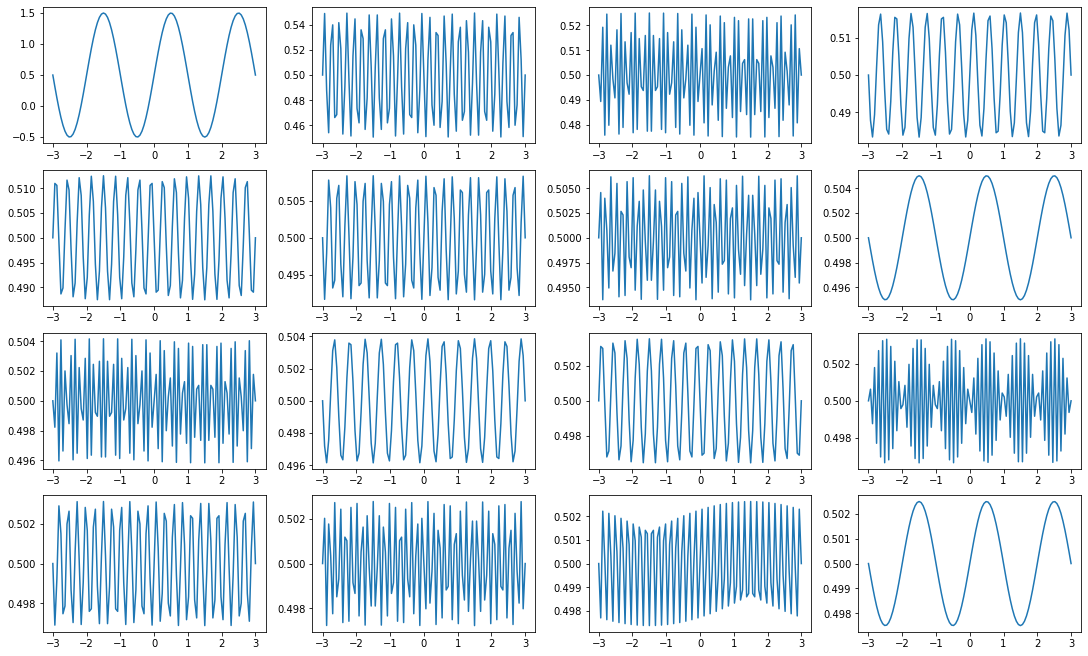

In [8]:
fig = plt.figure(figsize = (15, 9), constrained_layout = True)

grid = plt.GridSpec(4, 4, fig)

ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])#, sharey = ax0)
ax2 = fig.add_subplot(grid[0, 2])#, sharey = ax0)
ax3 = fig.add_subplot(grid[0, 3])#, sharey = ax0)

ax0.plot(x_, Fn[0])
ax1.plot(x_, Fn[5])
ax2.plot(x_, Fn[10])
ax3.plot(x_, Fn[15])

ax4 = fig.add_subplot(grid[1, 0])#, sharey = ax0)
ax5 = fig.add_subplot(grid[1, 1])#, sharey = ax0)
ax6 = fig.add_subplot(grid[1, 2])#, sharey = ax0)
ax7 = fig.add_subplot(grid[1, 3])#, sharey = ax0)

ax4.plot(x_, Fn[20])
ax5.plot(x_, Fn[30])
ax6.plot(x_, Fn[40])
ax7.plot(x_, Fn[50])

ax8 = fig.add_subplot(grid[2, 0])#, sharey = ax0)
ax9 = fig.add_subplot(grid[2, 1])#, sharey = ax0)
ax10 = fig.add_subplot(grid[2, 2])#, sharey = ax0)
ax11 = fig.add_subplot(grid[2, 3])#, sharey = ax0)

ax8.plot(x_, Fn[60])
ax9.plot(x_, Fn[65])
ax10.plot(x_, Fn[70])
ax11.plot(x_, Fn[75])

ax12 = fig.add_subplot(grid[3, 0])#, sharey = ax0)
ax13 = fig.add_subplot(grid[3, 1])#, sharey = ax0)
ax14 = fig.add_subplot(grid[3, 2])#, sharey = ax0)
ax15 = fig.add_subplot(grid[3, 3])#, sharey = ax0)

ax12.plot(x_, Fn[80])
ax13.plot(x_, Fn[90])
ax14.plot(x_, Fn[95])
ax15.plot(x_, Fn[100])

plt.show()

-------

## (2) Prova empírica da propriedade translação e mudança de fase

#### (2.1) - Crie duas imagens binárias contendo um mesmo objeto geométrico. A diferença entre as imagens é a translação 

In [9]:
square_01 = np.uint8([[(x >= 10) & (x <= 30) & (y >= 10) & (y <= 30) for y in range(41)] for x in range(41)])
square_02 = np.uint8([[(x >= 10) & (x <= 30) & (y - 5 >= 10) & (y - 5 <= 30) for y in range(41)] for x in range(41)])

square_diff = square_01 - square_02

Acima criamos duas imagens com um quadrado em cada. Na primeira imagem temos um quadrado no centro, e, na segunda, temos o quadrado com as mesmas dimensões mais deslocado horizontalmente. Mais adiante podemos ver cada uma das imagens.

#### (2.2) - Calcule o módulo da transformada de Fourier de cada uma das imagens

In [10]:
fft_square_01 = np.fft.fft2(square_01)
fftshift_square_01 = np.fft.fftshift(fft_square_01)

fft_square_02 = np.fft.fft2(square_02)
fftshift_square_02 = np.fft.fftshift(fft_square_02)

fft_square_diff = np.fft.fft2(square_diff)
fftshift_square_diff = np.fft.fftshift(fft_square_diff)

In [11]:
magspec_fftshift_square_01 = 20 * np.log(np.abs(fftshift_square_01))
magspec_fftshift_square_02 = 20 * np.log(np.abs(fftshift_square_02))
magspec_fftshift_square_diff = 20 * np.log(np.abs(fftshift_square_diff))

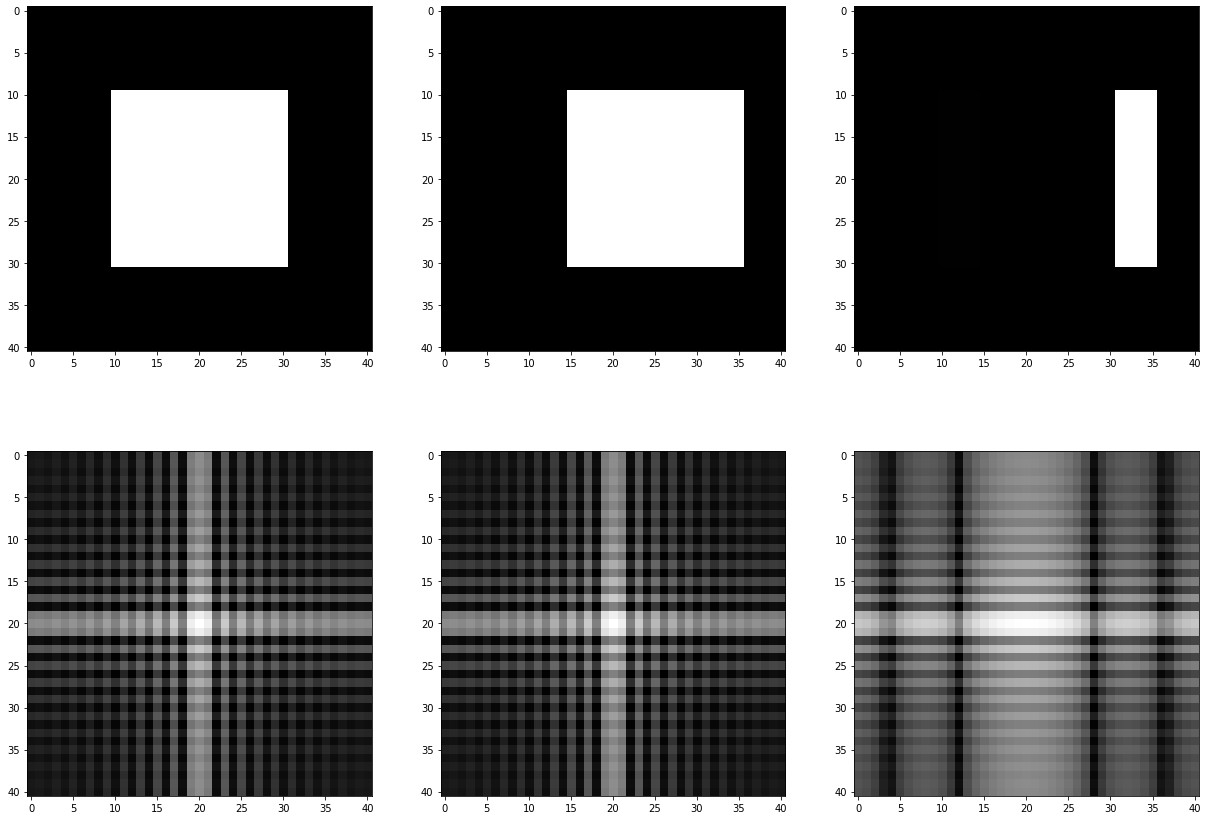

In [12]:
fig = plt.figure(figsize = (21, 15))

grid = plt.GridSpec(2, 3, fig)

ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])
ax2 = fig.add_subplot(grid[0, 2])

ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[1, 2])

ax0.imshow(square_01, cmap = 'gray')
ax1.imshow(square_02, cmap = 'gray')
ax2.imshow(square_diff, cmap = 'gray')

ax3.imshow(magspec_fftshift_square_01, cmap = 'gray')
ax4.imshow(magspec_fftshift_square_02, cmap = 'gray')
ax5.imshow(magspec_fftshift_square_diff, cmap = 'gray')

plt.show()

-------

## (3) Filtragem de Fourier

Agora iremos aplicar o filtro passa baixa em uma imagem. Faremos o uso de dois filtros diferentes: o passa baixa ideal, passa baixa butterworth.

Um filtro idel é definido da seguinte forma:
$$
\begin{equation}
H(u, v) = 
\begin{cases}
1, & \text{se} & D \leq D_{0} \\
0, & \text{se} & D > D_{0}
\end{cases}
\end{equation},
$$
onde 
$$
\begin{align}
D &= ((u - u_{0})^{2} + (v - v_{0})^{2})^{1/2} \\
u_{0} &= \lfloor \frac{M}{2} \rfloor \\
v_{0} &= \lfloor \frac{N}{2} \rfloor
\end{align}
$$
e $M$ e $N$ são as dimensões da imagem de entrada, e $D_{0}$ é a frequência de corte.

Já o filtro butterworth é definido da seguinte forma:
$$
\begin{equation}
H(u, v) = \frac{1}{1 + (\frac{D}{D_{0}})^{2n}}
\end{equation},
$$
onde $n$ é a ordem do filtro.

In [74]:
foto = cv.imread('../images/minha_foto.jpg')
foto = cv.cvtColor(foto, cv.COLOR_BGR2GRAY)

In [75]:
foto_fft = np.fft.fft2(foto)
foto_fft = np.fft.fftshift(foto_fft)

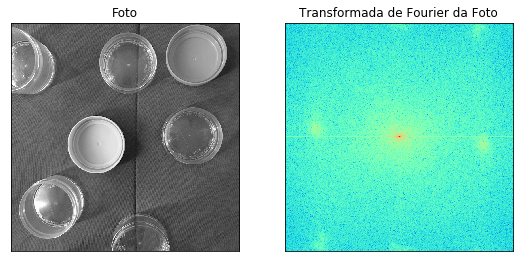

In [76]:
fig = plt.figure(figsize = (9, 6))

grid = plt.GridSpec(1, 2, fig)

ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])

ax0.imshow(foto, cmap = 'gray')
ax0.set_title('Foto')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(20 * np.log(np.abs(foto_fft) + 1), cmap = 'rainbow')
ax1.set_title('Transformada de Fourier da Foto')
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()

A seguir estão as funções para o passa baixa ideal e o passa baixa butterworth.

In [225]:
def passa_baixa_ideal(img, freq = 10):
    m, n = img.shape
    
    u0 = np.floor(m/2)
    v0 = np.floor(n/2)
    
    H = np.uint8([[np.sqrt((u - u0)**2 + (v - v0)**2) <= freq
                   for v in range(n)] for u in range(m)])
    
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    img_fft = img_fft * H
    return np.fft.ifft2(np.fft.ifftshift(img_fft)).real

In [243]:
def passa_baixa_butterworth(img, freq = 10, nn = 4):
    m, n = img.shape
    u0 = np.floor(m/2)
    v0 = np.floor(n/2)
    
    H = [[(1/(1 + (np.sqrt((u - u0)**2 + (v - v0)**2)/freq)**(2*nn)))
          for v in range(n)] for u in range(m)]
    
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    img_fft = img_fft * H
    return np.fft.ifft2(np.fft.ifftshift(img_fft)).real

In [244]:
img_lp = passa_baixa_ideal(foto, 18)
img_butter = passa_baixa_butterworth(foto, 18, 4)

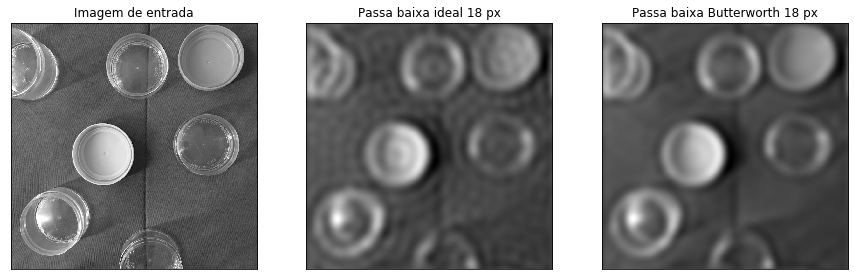

In [247]:
fig = plt.figure(figsize = (15, 9))

grid = plt.GridSpec(1, 3, fig)

ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])
ax2 = fig.add_subplot(grid[0, 2])

ax0.imshow(foto, cmap = 'gray')
ax0.set_title('Imagem de entrada')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(img_lp, cmap = 'gray')
ax1.set_title('Passa baixa ideal 18 px')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(img_butter, cmap = 'gray')
ax2.set_title('Passa baixa Butterworth 18 px')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

Considerando uma frequência de corte de $18$px, e aplicando na imagem de entrada, podemos ver acima o resultado de cada um dos filtros.

Podemos ver no resultado do filtro passa baixa ideal o efeito das *ripples* (fenômeno de Gibbs), que acontece por conta do truncamento da série. Ao contrário do passa baixa ideal, o filtro butterworth não possui o efeito das *ripples*.

-------

## (4) Filtros espaciais aproximados

Não consegui fazer essa etapa, pois não ficou claro para mim como criar o filtro espacial.